# ETL PROCESS

In [8]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [105]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 11.8 MB/s eta 0:00:0000:0100:01


In [10]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

In [12]:
# Extract
data_path = '/Users/sahil/My Data/Internship/Heart Disease data/Heart Disease data.csv'
df = pd.read_csv(data_path)

# Transform
# Data Cleaning
df.dropna(inplace=True)  # Remove rows with missing values

# Convert categorical variables to 'category' type
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['thal'] = df['thal'].astype('category')

df['sex'] = df['sex'].astype('category')

df['sex'] = df['sex'].map({0: 'Female', 1: 'Male'})
df['target'] = df['target'].map({0: 'No Heart Disease', 1: 'Heart Disease'})



# Load
# Save the cleaned data for analysis
df.to_csv('cleaned_heart_disease_data.csv', index=False)

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,0,125,212,0,1,168,0,1.0,2,2,3,No Heart Disease
1,53,Male,0,140,203,1,0,155,1,3.1,0,0,3,No Heart Disease
2,70,Male,0,145,174,0,1,125,1,2.6,0,0,3,No Heart Disease
3,61,Male,0,148,203,0,1,161,0,0.0,2,1,3,No Heart Disease
4,62,Female,0,138,294,1,1,106,0,1.9,1,3,2,No Heart Disease


# Exploratory Data Analysis (EDA)

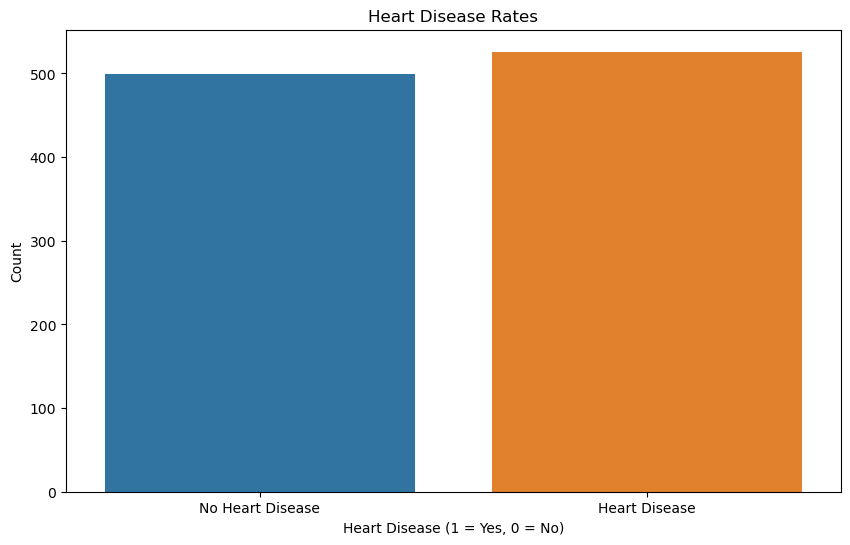

In [16]:
# Analyze heart disease rates
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=df)
plt.title('Heart Disease Rates')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

In [18]:
# Calculate key metrics
average_age = df['age'].mean()

print(f'Average Age: {average_age:.2f}')

Average Age: 54.43


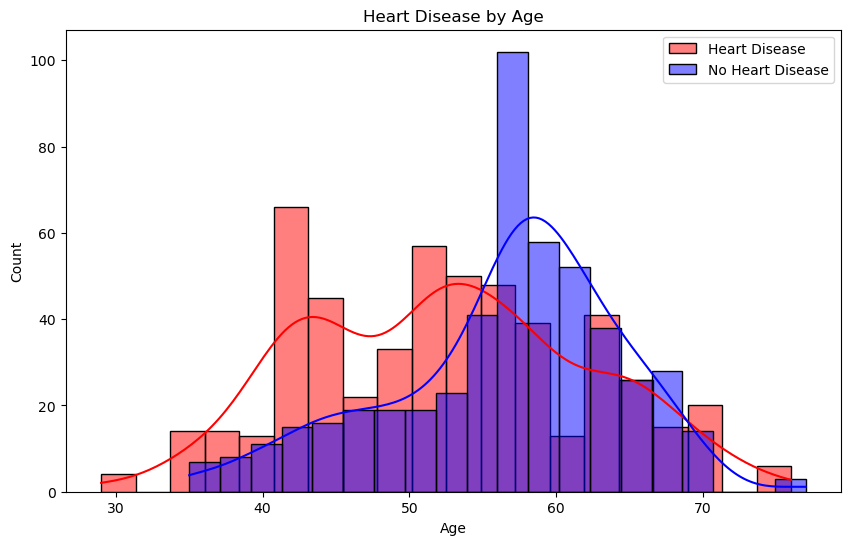

In [20]:
plt.figure(figsize=(10, 6))

# Plot for patients with heart disease
sns.histplot(df[df['target'] == 'Heart Disease']['age'], bins=20, kde=True, color='red', label='Heart Disease')

# Plot for patients without heart disease
sns.histplot(df[df['target'] == 'No Heart Disease']['age'], bins=20, kde=True, color='blue', label='No Heart Disease')

plt.title('Heart Disease by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

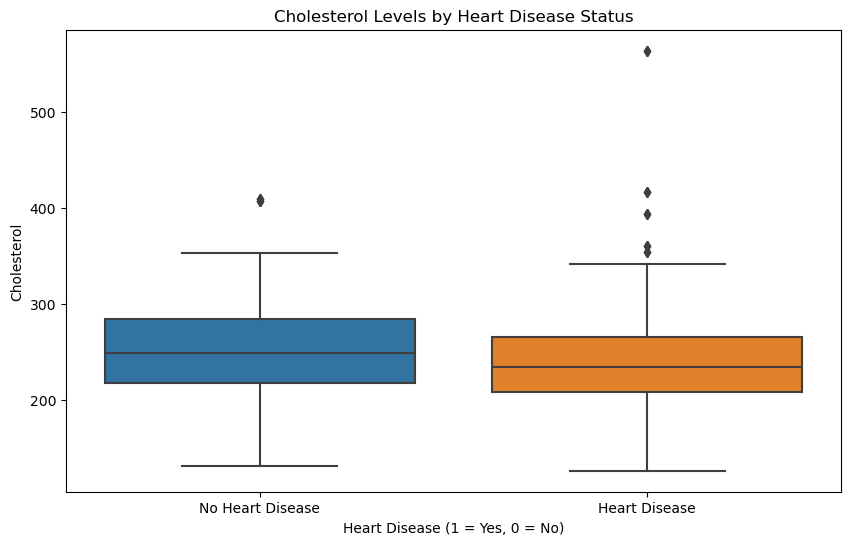

In [42]:
# Compare attributes
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Cholesterol')
plt.show()

               age  trestbps      chol       fbs   thalach     exang  \
age       1.000000  0.271121  0.219823  0.121243 -0.390227  0.088163   
trestbps  0.271121  1.000000  0.127977  0.181767 -0.039264  0.061197   
chol      0.219823  0.127977  1.000000  0.026917 -0.021772  0.067382   
fbs       0.121243  0.181767  0.026917  1.000000 -0.008866  0.049261   
thalach  -0.390227 -0.039264 -0.021772 -0.008866  1.000000 -0.380281   
exang     0.088163  0.061197  0.067382  0.049261 -0.380281  1.000000   
oldpeak   0.208137  0.187434  0.064880  0.010859 -0.349796  0.310844   
slope    -0.169105 -0.120445 -0.014248 -0.061902  0.395308 -0.267335   
ca        0.271551  0.104554  0.074259  0.137156 -0.207888  0.107849   

           oldpeak     slope        ca  
age       0.208137 -0.169105  0.271551  
trestbps  0.187434 -0.120445  0.104554  
chol      0.064880 -0.014248  0.074259  
fbs       0.010859 -0.061902  0.137156  
thalach  -0.349796  0.395308 -0.207888  
exang     0.310844 -0.267335  0.1

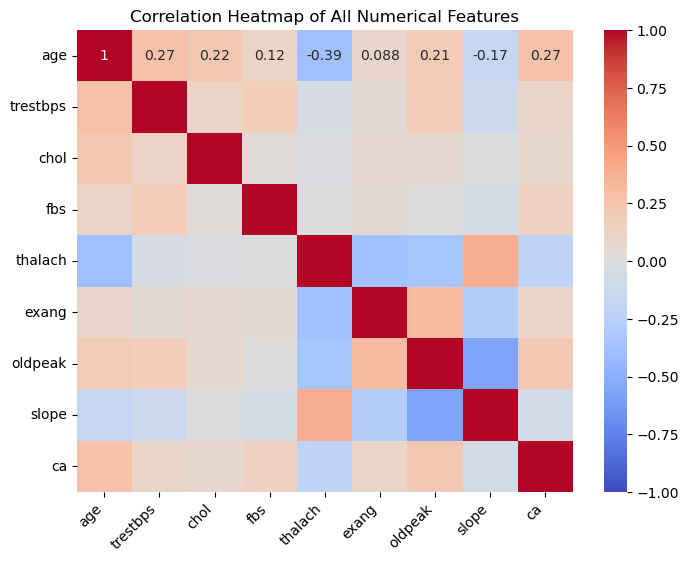

In [44]:
# Select all numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Check correlation matrix
print(correlation_matrix)

# Create a heatmap with adjusted figure size and font size for annotations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, annot_kws={"size": 10})
plt.title('Correlation Heatmap of All Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

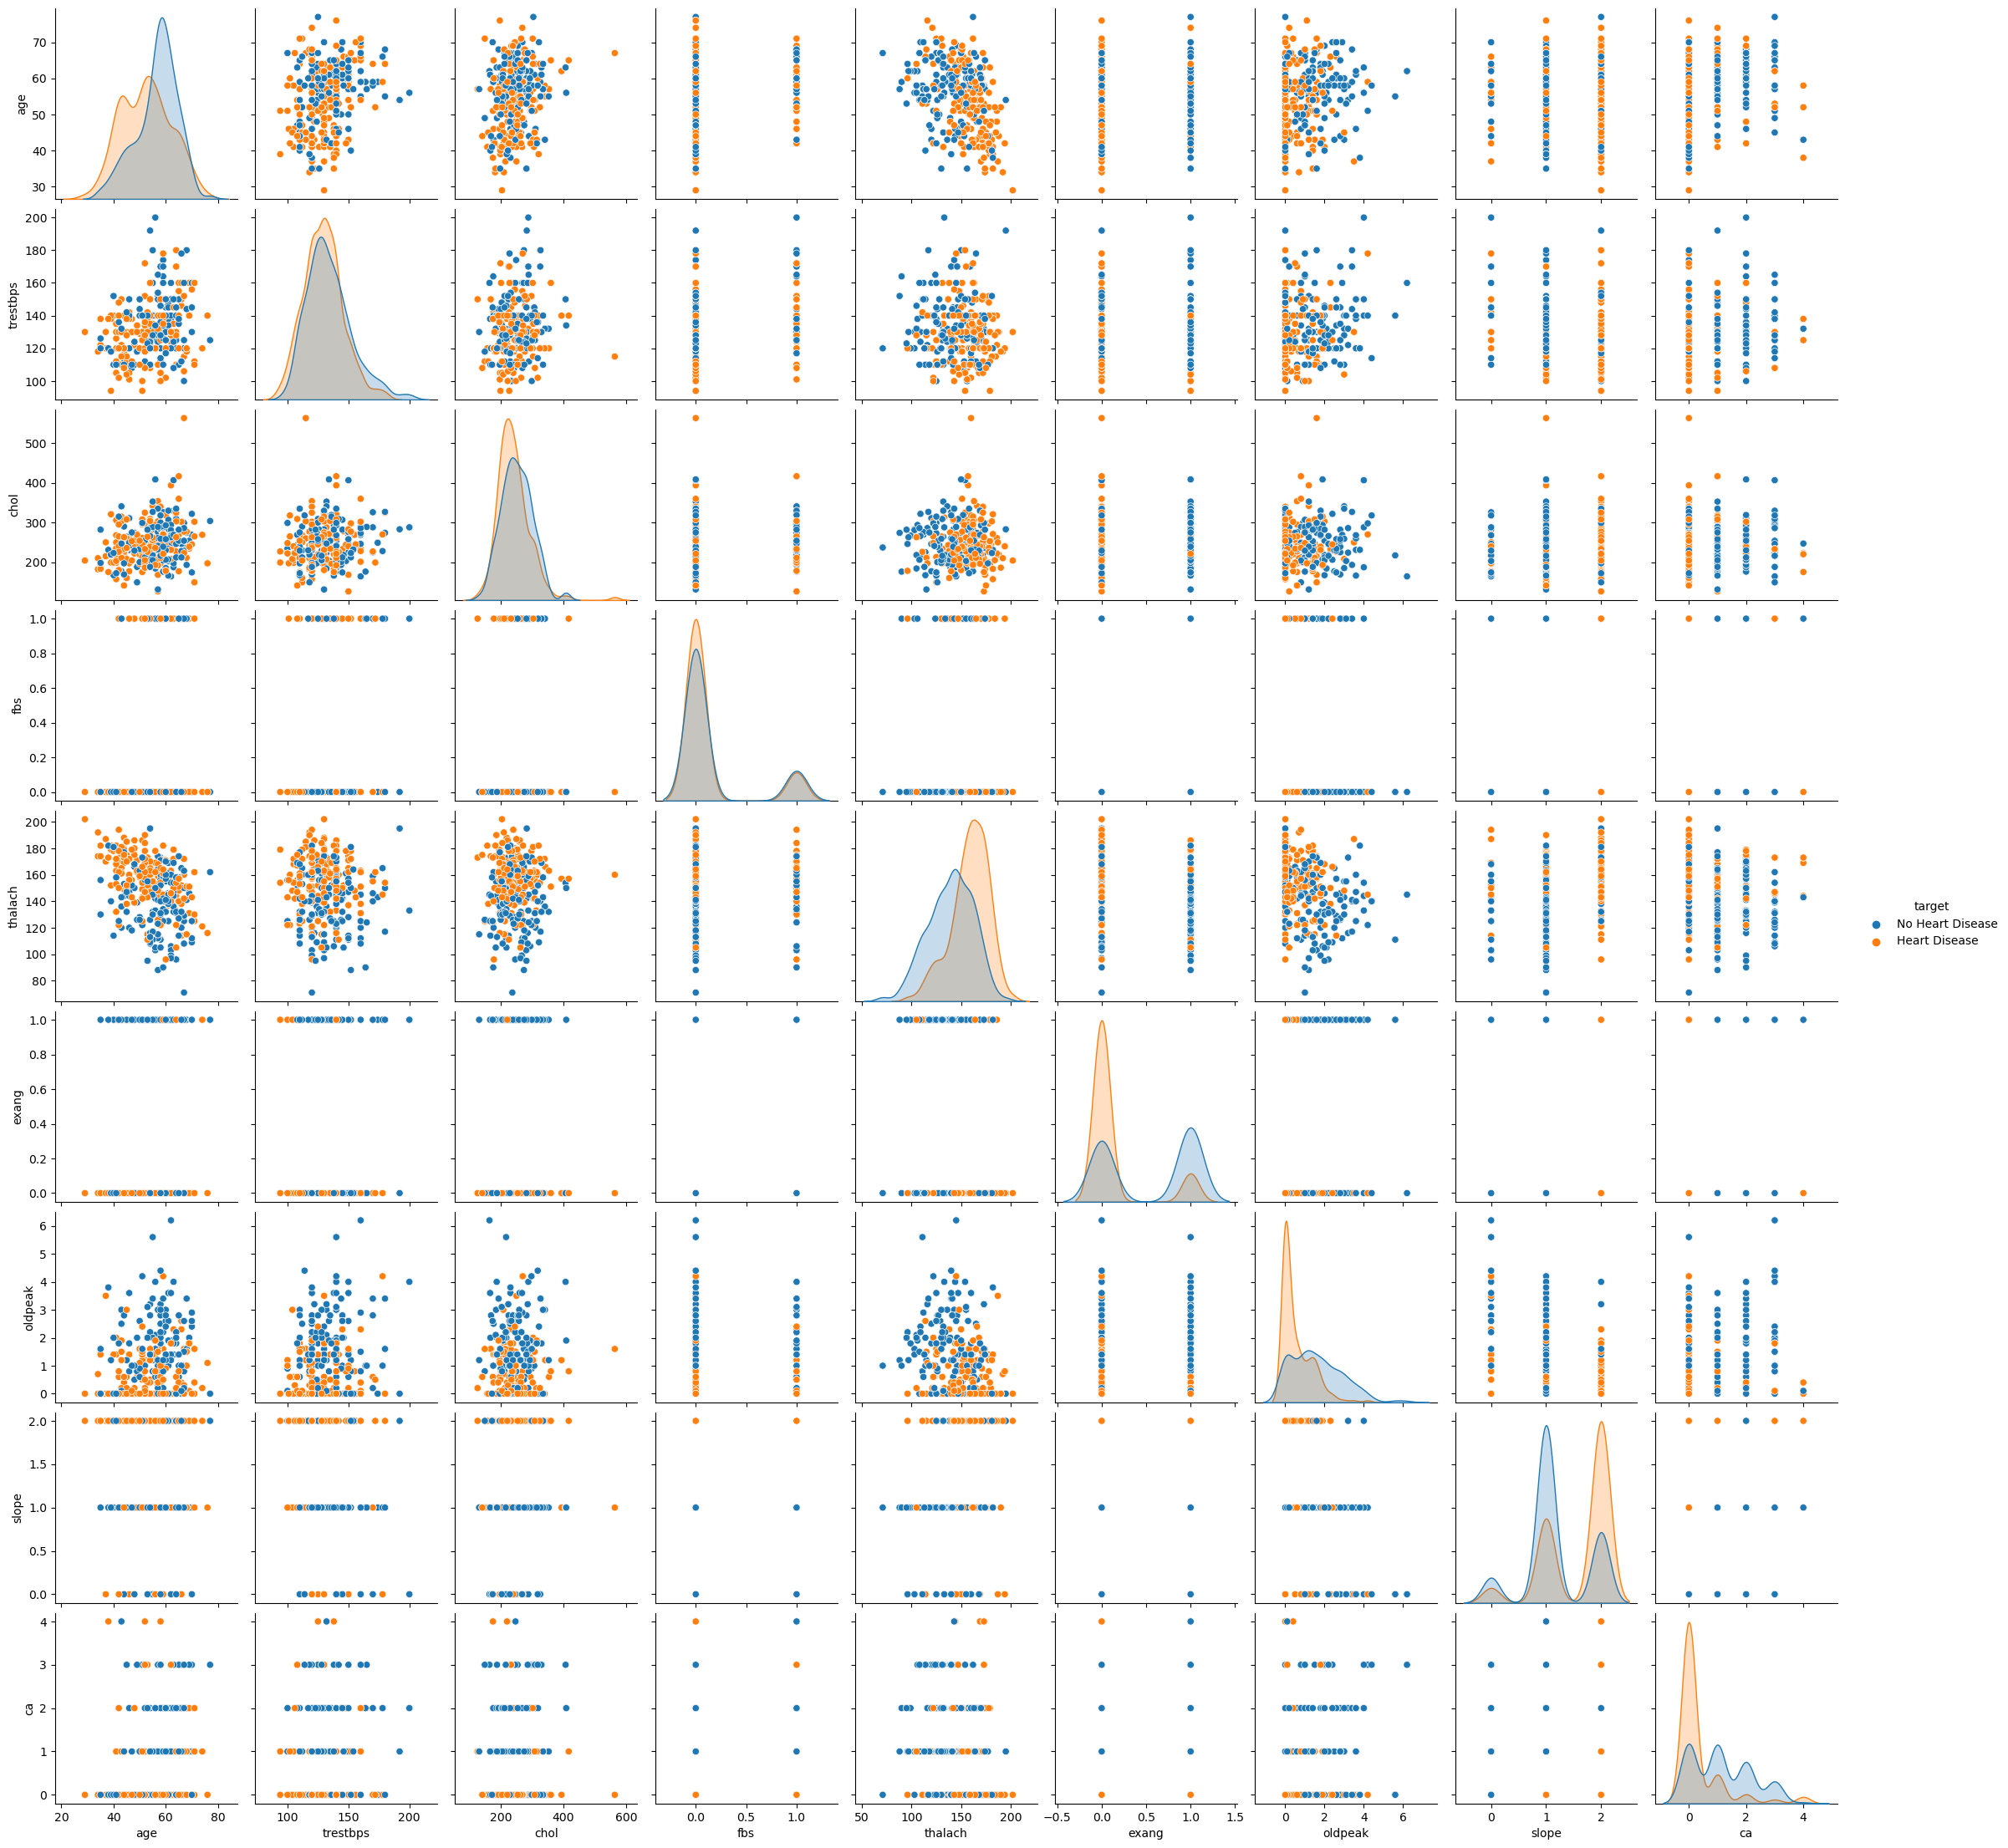

In [101]:
sns.pairplot(df, hue='target', diag_kind='kde')
plt.show()

In [117]:
app = dash.Dash(__name__)

# Create a scatter plot
fig = px.scatter(df, x='age', y='chol', color='target', title='Cholesterol vs Age')

app.layout = html.Div(children=[
    html.H1(children='Heart Disease Dashboard'),
    dcc.Graph(
        id='scatter-plot',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)


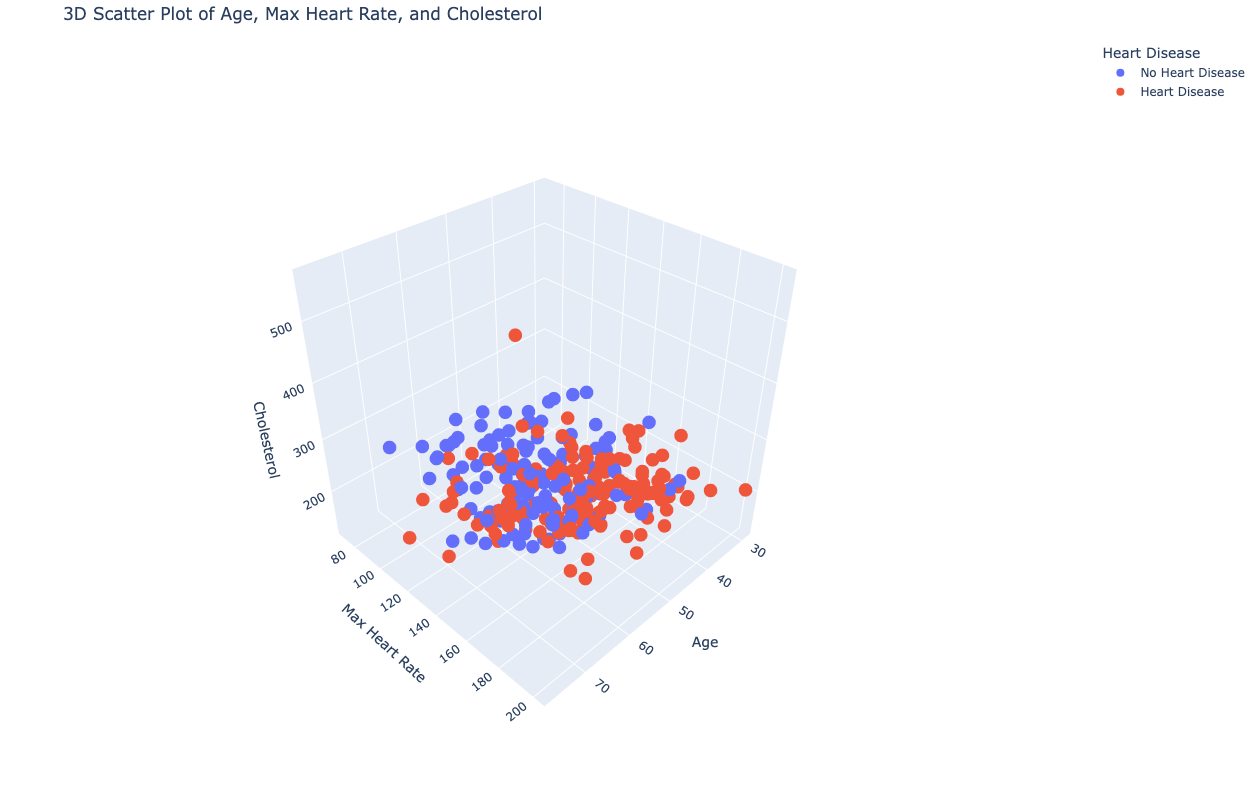

In [119]:
import pandas as pd
import plotly.express as px

# Load the data
df = pd.read_csv('cleaned_heart_disease_data.csv')

# Create the 3D scatter plot
fig = px.scatter_3d(df, 
                    x='age', 
                    y='thalach', 
                    z='chol',
                    color='target',
                    hover_data=['sex', 'cp', 'trestbps'],
                    labels={'age': 'Age', 
                            'thalach': 'Max Heart Rate', 
                            'chol': 'Cholesterol',
                            'target': 'Heart Disease'},
                    title='3D Scatter Plot of Age, Max Heart Rate, and Cholesterol')

# Update the layout for better visibility
fig.update_layout(scene = dict(
                    xaxis_title='Age',
                    yaxis_title='Max Heart Rate',
                    zaxis_title='Cholesterol'),
                  width=800,
                  height=800,
                  margin=dict(r=20, b=10, l=10, t=40))

# Show the plot
fig.show()
